# Hometask 2

**Домашнее задание**:

Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете MNIST с другими параметрами. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.

In [1]:
# !pip install keras tensorflow plotly scikeras
# !pip install scikeras
# !activate tensorflow
# ! pip install tensorflow
# !pip freeze
# import tens

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import itertools
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

%matplotlib inline

2023-04-11 13:33:47.359236: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 13:33:48.885201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
    try:
        tf.config.set_logical_device_configuration(
            gpus[0],
            [tf.config.LogicalDeviceConfiguration(memory_limit=1024 * 4)])
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


2023-04-11 13:33:50.603920: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-11 13:33:50.674810: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-11 13:33:50.674919: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-11 13:33:50.678892: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-11 13:33:50.679028: I tensorflow/compile

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.min(), X_train.max()

(0, 255)

In [6]:
type(X_train)

numpy.ndarray

In [7]:
X_train[0].size, X_train.shape

(784, (60000, 28, 28))

In [8]:
X_train[0].size ** 0.5

28.0

Посмотрим на данные

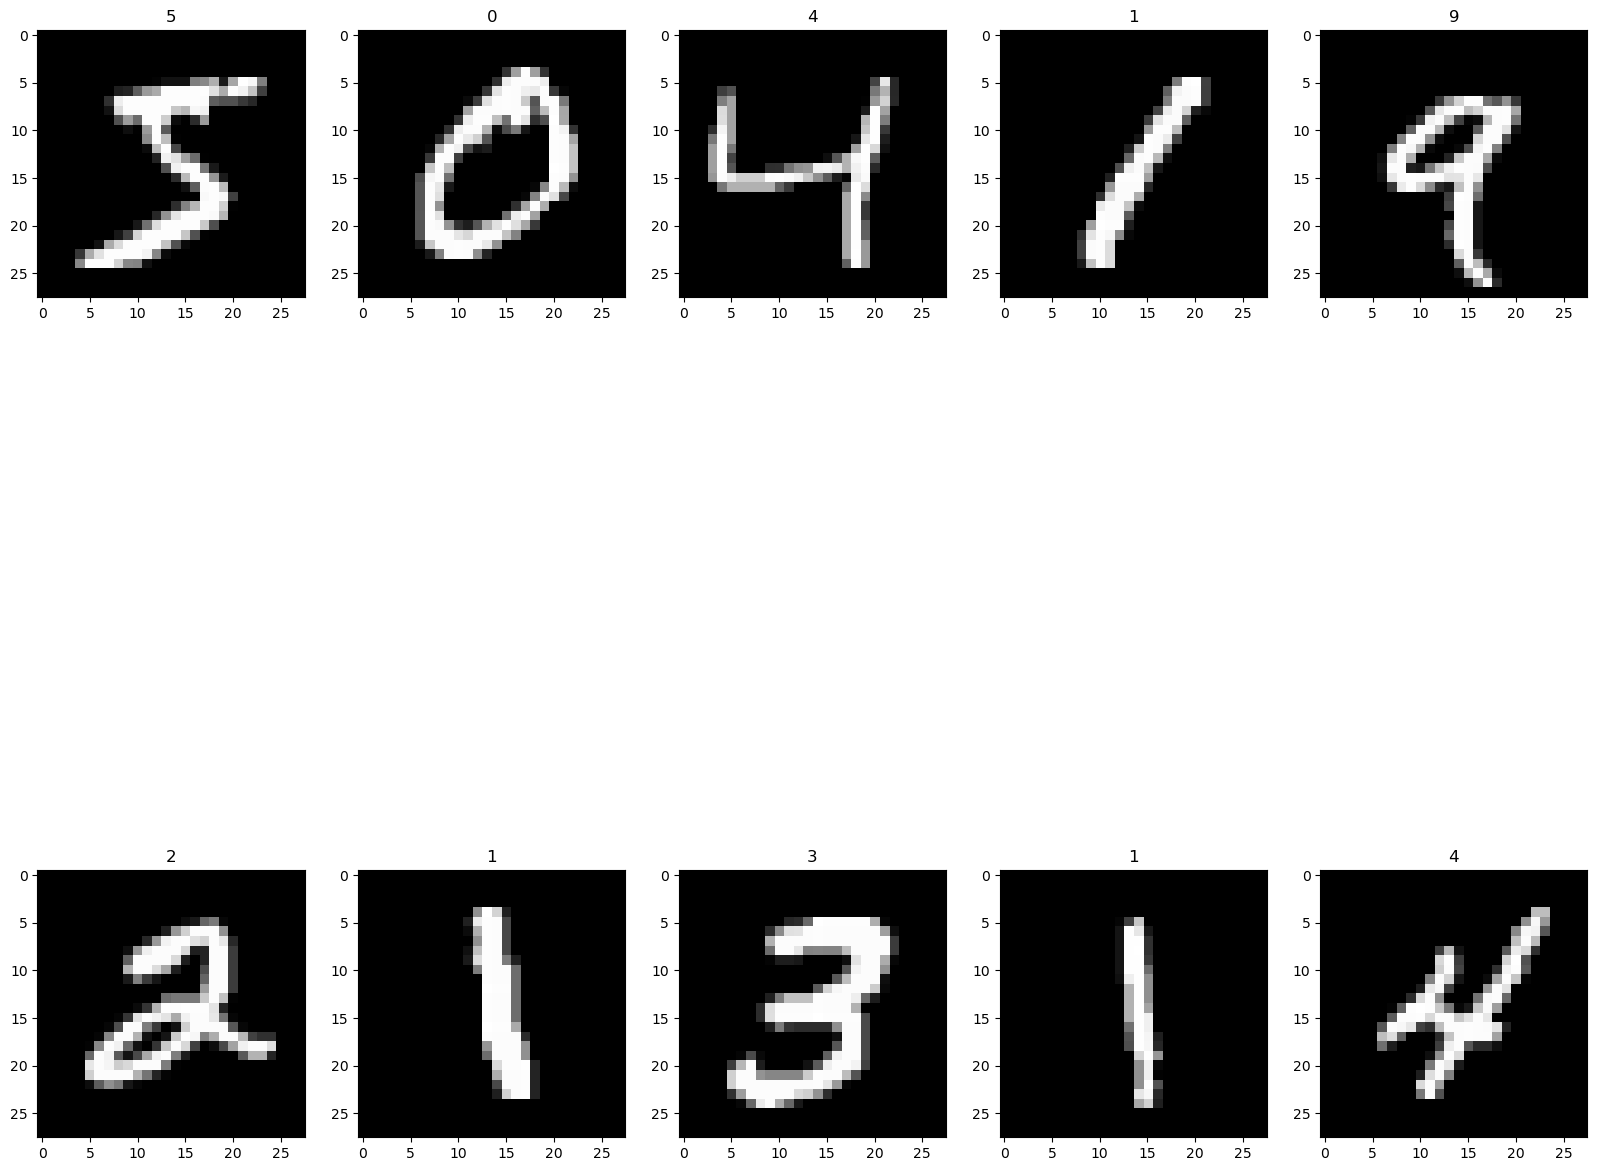

In [9]:
fig, axes = plt.subplots(2, 5)

for i in range(5):
    for j in range(2):
        axes[j][i].imshow(X_train[i + j * 5], cmap='gray')
        axes[j][i].set_title(y_train[i + j * 5])

fig.set_figwidth(20)
fig.set_figheight(20)
plt.show()

Сделаем базовую модель

In [10]:
X_train = X_train.reshape((-1, X_train[0].size))
X_test = X_test.reshape((-1, X_train[0].size))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [11]:
%%time
model1 = Sequential()
model1.add(Dense(64, input_shape=(X_train[0].size, ), activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='sigmoid'))

model1.save_weights('model_64_32_10_rs.h5')

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
CPU times: user 152 ms, sys: 37.2 ms, total: 189 ms
Wall time: 338 ms


Обучим модель

In [12]:
model1.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [13]:
model1.load_weights('model_64_32_10_rs.h5')

# Train the model
model1.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=256,
    validation_data=(X_test, y_test)
)

# Evaluate the model
results = model1.evaluate(X_test, y_test)
print('test loss, test acc:', results)

Epoch 1/5


2023-04-11 13:33:55.296811: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fdf30009f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-11 13:33:55.296892: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
2023-04-11 13:33:55.588328: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-11 13:33:55.809574: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-11 13:33:55.923164: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 [==============================] - 4s 10ms/step - loss: 1.7344 - accuracy: 0.5156 - val_loss: 1.0966 - val_accuracy: 0.7667
Epoch 2/5
235/235 [==============================] - 2s 9ms/step - loss: 0.8146 - accuracy: 0.8137 - val_loss: 0.6138 - val_accuracy: 0.8508
Epoch 3/5
235/235 [==============================] - 2s 10ms/step - loss: 0.5509 - accuracy: 0.8600 - val_loss: 0.4760 - val_accuracy: 0.8765
Epoch 4/5
235/235 [==============================] - 2s 9ms/step - loss: 0.4572 - accuracy: 0.8774 - val_loss: 0.4139 - val_accuracy: 0.8874
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.3788 - accuracy: 0.8951
test loss, test acc: [0.3788391053676605, 0.8950999975204468]


Сделаем валидаю на train данных.

In [14]:
model1.load_weights('model_64_32_10_rs.h5')

# Train the model
model1.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.2
)

# Evaluate the model
results = model1.evaluate(X_test, y_test)
print('test loss, test acc:', results)

Epoch 1/5
188/188 [==============================] - 2s 12ms/step - loss: 1.8673 - accuracy: 0.4531 - val_loss: 1.3225 - val_accuracy: 0.7181
Epoch 2/5
188/188 [==============================] - 2s 11ms/step - loss: 0.9924 - accuracy: 0.7790 - val_loss: 0.7185 - val_accuracy: 0.8406
Epoch 3/5
188/188 [==============================] - 2s 11ms/step - loss: 0.6465 - accuracy: 0.8424 - val_loss: 0.5288 - val_accuracy: 0.8706
Epoch 4/5
188/188 [==============================] - 2s 11ms/step - loss: 0.5183 - accuracy: 0.8666 - val_loss: 0.4478 - val_accuracy: 0.8842
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.4122 - accuracy: 0.8901
test loss, test acc: [0.41224637627601624, 0.8901000022888184]


Для перебора разных параметров и при изучении матчасти оказалось, что для применения GridSearchCV необходимо использовать KerasClassifier, куда надо передавать функцию создающую модель.

In [15]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
# loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'], activation_layers='relu', activation_last='sigmoid'
def create_model1(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'], activation_layers='relu', activation_last='sigmoid'):
    model1 = Sequential()
    model1.add(Dense(64, input_shape=(X_train[0].size, ), activation='relu'))
    model1.add(Dense(32, activation='relu'))
    model1.add(Dense(10, activation='sigmoid'))
    
    model1.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model1

In [17]:
params_grid = {
    'epochs':[5, 10, 15],
    'batch_size':[256, 512, 1024],
    'loss':['poisson', 'binary_crossentropy', 'categorical_crossentropy'],
    'optimizer':['SGD', 'RMSprop', 'Adam'], #, 'Adagrad', 'Adamax'],
    'metrics':['accuracy', 'binary_crossentropy', 'hinge'],
    'activation_layers':['relu', 'elu', 'selu'],
    'activation_last':['tanh', 'sigmoid'],
}

Попытка ручного подбора параметров для последующего анализа наиболее эффективных параметров - не успешна. Похоже есть какой-то таймаут на работу ноутбука. И соответственно оставить компьютер без присмотра на посчитать не получается.

In [18]:
%%time

# def custom_grid_search(func_create_model=None):
#     best_params = dict()
#     history = list()
    
#     t = 1
#     for k in params_grid.keys():
#         t *= len(params_grid[k])
#     print('Calculated hits {}'.format(t))
#     i = 0

#     for epoch in params_grid['epochs']:
#         for batch_size in params_grid['batch_size']:
#             for optimizer in params_grid['optimizer']:
#                 for metrics in params_grid['metrics']:
#                     for activation_layers in params_grid['activation_layers']:
#                         for activation_last in params_grid['activation_last']:
#                             for loss in params_grid['loss']:
#                                 model1 = func_create_model(loss=loss, optimizer=optimizer, metrics=[metrics], activation_layers=activation_layers, activation_last=activation_last)
#                                 model1.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_test, y_test))

#                                 results = model1.evaluate(X_test, y_test)
#                                 print('test loss, test acc:', results)

#                                 if results[1] > best_params.get('acc', 99999999):
#                                     best_params['acc'] = results[1]
#                                     best_params['loss'] = results[0]
#                                     best_params['loss_type'] = loss
#                                     best_params['epoch'] = epoch
#                                     best_params['batch_size'] = batch_size
#                                     best_params['optimizer'] = optimizer
#                                     best_params['metrics'] = metrics
#                                     best_params['activation_layers'] = activation_layers
#                                     best_params['activation_last'] - activation_last

#                                 history.append([results[1], results[0], loss, epoch, batch_size, optimizer, metrics, activation_layers, activation_last])
                                
#                                 i += 1
#                                 print('ITER = {}/{}'.format(i, t))

#     return best_params, history

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs


In [19]:
# def calc_results(best_params, history):
#     history = pd.DataFrame(history, columns=['acc', 'loss', 'loss_type', 'epoch', 'batch_size', 'optimizer', 'metrics', 'activation_layers', 'activation_last'])
#     history.sort_values('loss', axis=0, ascending=True).head(20)

In [20]:
# best_params1, history1 = custom_grid_search(create_model1)
# calc_results(best_params1, history1)

Очередная попытка использовать GridSearchCV тоже не успешна. Google colab нужны деньги, т.к. серьезные ресурсы на посчитать просто не дождаться. Локально (даже с учётом вычислений на видеркарте) тоже надо слишком много времени. И как оказалось памяти. Чем больше потоков запускается, тем больше памяти требуется на видеокарте. Для одного птока выделяет практически всю свободную память (подяка 4-5 Гб), а дальше (то ли на поток, то ли на новую итерацию) пытается снова выделить память, которой нет (в общем ни оперативной (там хоть свап есть), ни на карте). Сделано для избежания фрагментации памяти. Но здесь и данных то не так много. Где-то есть не слишком эффективная работа с памятью. Но что-то не получилось разобраться, даже с попыткой её ограничения. Всё равно пытается выделить больше.

Ещё одно место медленного выполнения это `cv` - слишком много валидаций. Это хороший вариант для качественного обучения, но для подбора параметров слишком долго.

In [21]:
%%time

# model1 = KerasClassifier(build_fn=create_model1, optimizer=None, metrics=None, activation_layers=None, activation_last=None)

# grid = GridSearchCV(estimator=model1, param_grid=params_grid, cv=2, n_jobs=2, verbose=1)
# grid_result = grid.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.68 µs


In [22]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# df_result = pd.DataFrame(grid_result.cv_results_)
# df_result.sort_values('rank_test_score', axis=0, ascending=False).head(10)

In [23]:
# df_result.sort_values('rank_test_score', axis=0, ascending=False)['params'].head(10)

При малом количестве параметров удалось запустить, и получить какие-то результаты. Но при полноценном подборе воспроизвести не удалось.

Лучшая функция потерь - `sparse_categorical_crossentropy`, лучшая метрика - `hinge` (хотя на втором месте `accuracy`, так что разница не большая), батч в 256 айтемов эффективнее чем 32 и 1024, а эпох - 10 (судя по топу результатов, хотя там есть и 20 и 5). При этом функция потерь `sparse_categorical_crossentropy` для данного набора не должна была работать. Либо если и работать то не в ланном виде, как представлены данные. Случайный результат.

Судя по результатам однозначно сказать, что какая-то комбиная победит нельзя. Но есть определённые параметры, которые могут привести в конкретной задаче к более/менее макисмально возным результатам обучения сети.

Сделаем другой вариант сети и снова обучим. Возьмём что-нибудь до 70 тыс. параметров.

In [24]:
model2 = Sequential()
model2.add(Dense(88, input_shape=(X_train[0].size, ), activation='relu'))
model2.add(Dense(10, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 88)                69080     
                                                                 
 dense_4 (Dense)             (None, 10)                890       
                                                                 
Total params: 69,970
Trainable params: 69,970
Non-trainable params: 0
_________________________________________________________________


In [25]:
def create_model2(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'], activation_layers='relu', activation_last='sigmoid'):
    model2 = Sequential()
    model2.add(Dense(88, input_shape=(X_train[0].size, ), activation='relu'))
    model2.add(Dense(10, activation='sigmoid'))
    
    model2.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model2

In [26]:
# model2 = KerasClassifier(model=create_model2, optimizer=None, metrics=None, activation_layers=None, activation_last=None)

# grid = GridSearchCV(estimator=model2, param_grid=params_grid, n_jobs=-1, cv=3, verbose=1)
# grid_result = grid.fit(X_train, y_train)

In [27]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# df_result = pd.DataFrame(grid_result.cv_results_)
# df_result.sort_values('rank_test_score', axis=0, ascending=False).head(10)

In [28]:
# best_params2, history2 = custom_grid_search(create_model2)
# calc_results(best_params2, history2)

Сделаем ещё одну сеть (более глубокую), до 70 тыс. параметров.

In [29]:
model3 = Sequential()
model3.add(Dense(54, input_shape=(X_train[0].size, ), activation='relu'))
model3.add(Dense(48, activation='relu'))
model3.add(Dense(40, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(10, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 54)                42390     
                                                                 
 dense_6 (Dense)             (None, 48)                2640      
                                                                 
 dense_7 (Dense)             (None, 40)                1960      
                                                                 
 dense_8 (Dense)             (None, 32)                1312      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 10)                170       
                                                                 
Total params: 49,000
Trainable params: 49,000
Non-trai

In [30]:
def create_model3(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'], activation_layers='relu', activation_last='sigmoid'):
    model3 = Sequential()
    model3.add(Dense(54, input_shape=(X_train[0].size, ), activation='relu'))
    model3.add(Dense(48, activation='relu'))
    model3.add(Dense(40, activation='relu'))
    model3.add(Dense(32, activation='relu'))
    model3.add(Dense(16, activation='relu'))
    model3.add(Dense(10, activation='sigmoid'))
    
    model3.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model3

In [31]:
# model3 = KerasClassifier(model=create_model3, optimizer=None, metrics=None, activation_layers=None, activation_last=None)

# grid = GridSearchCV(estimator=model3, param_grid=params_grid, n_jobs=-1, cv=3, verbose=1)
# grid_result = grid.fit(X_train, y_train)

In [32]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# df_result = pd.DataFrame(grid_result.cv_results_)
# df_result.sort_values('rank_test_score', axis=0, ascending=False).head(10)

In [33]:
# best_params3, history3 = custom_grid_search(create_model3)
# calc_results(best_params3, history3)

Попробуем что-нибудь новое, типа Dropout слоя. Оценим эффект.

In [34]:
def create_model4(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'], activation_layers='relu', activation_last='sigmoid'):
    model4 = Sequential()
    model4.add(Dense(64, input_shape=(X_train[0].size, ), activation='relu'))
    model4.add(Dropout(0.2))
    model4.add(Dense(32, activation='relu'))
    model4.add(Dropout(0.3))
    model4.add(Dense(10, activation='sigmoid'))
    
    model4.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    return model4

In [35]:
# model4 = KerasClassifier(model=create_model4, optimizer=None, metrics=None, activation_layers=None, activation_last=None)

# grid = GridSearchCV(estimator=model4, param_grid=params_grid, n_jobs=-1, cv=3, verbose=1)
# grid_result = grid.fit(X_train, y_train)

In [36]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# df_result = pd.DataFrame(grid_result.cv_results_)
# df_result.sort_values('rank_test_score', axis=0, ascending=False).head(10)

In [37]:
# best_params4, history4 = custom_grid_search(create_model4)
# calc_results(best_params4, history4)

В результате будем делать ручной подбор по одному параметру за раз.

Начнём с функции потерь.

In [38]:
%%time
results_list = list()

for i, func_create_model in enumerate([create_model1, create_model2, create_model3, create_model4]):
    weight_flag = False
    for loss in params_grid['loss']:
        model = func_create_model(loss=loss)
        if not weight_flag:
            model.save_weights('model1.h5')
            weight_flag = True
        else:
            model.load_weights('model1.h5')

        model.fit(X_train, y_train, epochs=10, batch_size=1024, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results)

        # model, loss, loss_err, acc
        results_list.append([i + 1, loss, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'loss_func', 'loss_err', 'acc'])
df_results.sort_values('loss_err', axis=0, ascending=True)

313/313 [==============================] - 1s 5ms/step - loss: 0.3292 - accuracy: 0.2151
test loss, test acc: [0.32917872071266174, 0.2151000052690506]
313/313 [==============================] - 1s 4ms/step - loss: 0.3148 - accuracy: 0.3639
test loss, test acc: [0.3147542476654053, 0.36390000581741333]
313/313 [==============================] - 2s 6ms/step - loss: 0.6616 - accuracy: 0.8303
test loss, test acc: [0.6616070866584778, 0.830299973487854]
313/313 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.3130
test loss, test acc: [0.3246877193450928, 0.31299999356269836]
313/313 [==============================] - 1s 4ms/step - loss: 0.3091 - accuracy: 0.4128
test loss, test acc: [0.3090948164463043, 0.41280001401901245]
313/313 [==============================] - 2s 8ms/step - loss: 0.6647 - accuracy: 0.8490
test loss, test acc: [0.664739191532135, 0.8489999771118164]
313/313 [==============================] - 1s 4ms/step - loss: 0.3491 - accuracy: 0.1269
tes

,model,loss_func,loss_err,acc
4,2,binary_crossentropy,0.309095,0.4128
1,1,binary_crossentropy,0.314754,0.3639
10,4,binary_crossentropy,0.322470,0.2663
3,2,poisson,0.324688,0.3130
0,1,poisson,0.329179,0.2151
7,3,binary_crossentropy,0.335177,0.1393
9,4,poisson,0.341262,0.2022
6,3,poisson,0.349113,0.1269
2,1,categorical_crossentropy,0.661607,0.8303
5,2,categorical_crossentropy,0.664739,0.8490


In [39]:
df_results.sort_values('acc', axis=0, ascending=False)

,model,loss_func,loss_err,acc
5,2,categorical_crossentropy,0.664739,0.8490
2,1,categorical_crossentropy,0.661607,0.8303
11,4,categorical_crossentropy,0.942695,0.8117
8,3,categorical_crossentropy,1.106887,0.6746
4,2,binary_crossentropy,0.309095,0.4128
1,1,binary_crossentropy,0.314754,0.3639
3,2,poisson,0.324688,0.3130
10,4,binary_crossentropy,0.322470,0.2663
0,1,poisson,0.329179,0.2151
9,4,poisson,0.341262,0.2022


По результатам выбираем `categorical_crossentropy` функцию потерь, т.к. в нашем случае одна местрика и можно анализировать по ней.

Проанализируем как размет батча влияет на обучение.

In [40]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for batch_size in params_grid['batch_size']:
        model = func_create_model(loss='categorical_crossentropy')
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results)

        # model, loss, loss_err, acc
        results_list.append([i + 1, batch_size, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'batch_size', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=False)

313/313 [==============================] - 2s 8ms/step - loss: 0.4501 - accuracy: 0.8848
test loss, test acc: [0.45006757974624634, 0.8848000168800354]
313/313 [==============================] - 2s 6ms/step - loss: 0.7123 - accuracy: 0.8311
test loss, test acc: [0.7123497724533081, 0.8310999870300293]
313/313 [==============================] - 2s 6ms/step - loss: 1.2027 - accuracy: 0.7217
test loss, test acc: [1.2027086019515991, 0.7217000126838684]
313/313 [==============================] - 2s 6ms/step - loss: 0.4621 - accuracy: 0.8834
test loss, test acc: [0.4621286988258362, 0.883400022983551]
313/313 [==============================] - 2s 6ms/step - loss: 0.6552 - accuracy: 0.8470
test loss, test acc: [0.6552147269248962, 0.847000002861023]
313/313 [==============================] - 2s 6ms/step - loss: 1.0065 - accuracy: 0.7934
test loss, test acc: [1.0064692497253418, 0.79339998960495]
313/313 [==============================] - 2s 7ms/step - loss: 0.5056 - accuracy: 0.8510
test los

,model,batch_size,loss_err,acc
0,1,256,0.450068,0.8848
3,2,256,0.462129,0.8834
9,4,256,0.571383,0.8646
6,3,256,0.505572,0.8510
4,2,512,0.655215,0.8470
1,1,512,0.712350,0.8311
10,4,512,1.003074,0.8018
5,2,1024,1.006469,0.7934
2,1,1024,1.202709,0.7217
11,4,1024,1.647763,0.6479


Лучшие результаты на batch-е 256, его и продолжим использовать.

In [41]:
params_grid

{'epochs': [5, 10, 15],
 'batch_size': [256, 512, 1024],
 'loss': ['poisson', 'binary_crossentropy', 'categorical_crossentropy'],
 'optimizer': ['SGD', 'RMSprop', 'Adam'],
 'metrics': ['accuracy', 'binary_crossentropy', 'hinge'],
 'activation_layers': ['relu', 'elu', 'selu'],
 'activation_last': ['tanh', 'sigmoid']}

Поменяем функции активации в скрытых слоях.

In [42]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for activation_layers in params_grid['activation_layers']:
        model = func_create_model(loss='categorical_crossentropy', activation_layers=activation_layers)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=5, batch_size=256, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results)

        # model, loss, loss_err, acc
        results_list.append([i + 1, activation_layers, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'activation_layers', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=False)

313/313 [==============================] - 3s 8ms/step - loss: 0.4324 - accuracy: 0.8914
test loss, test acc: [0.4323614239692688, 0.8913999795913696]
313/313 [==============================] - 3s 8ms/step - loss: 0.4321 - accuracy: 0.8916
test loss, test acc: [0.432068407535553, 0.8916000127792358]
313/313 [==============================] - 3s 8ms/step - loss: 0.4338 - accuracy: 0.8892
test loss, test acc: [0.4338372051715851, 0.88919997215271]
313/313 [==============================] - 2s 8ms/step - loss: 0.4523 - accuracy: 0.8857
test loss, test acc: [0.4522746205329895, 0.885699987411499]
313/313 [==============================] - 2s 7ms/step - loss: 0.4518 - accuracy: 0.8859
test loss, test acc: [0.451846718788147, 0.8859000205993652]
313/313 [==============================] - 2s 8ms/step - loss: 0.4518 - accuracy: 0.8856
test loss, test acc: [0.4517730474472046, 0.8855999708175659]
313/313 [==============================] - 3s 8ms/step - loss: 0.4827 - accuracy: 0.8561
test loss,

,model,activation_layers,loss_err,acc
1,1,elu,0.432068,0.8916
0,1,relu,0.432361,0.8914
2,1,selu,0.433837,0.8892
4,2,elu,0.451847,0.8859
3,2,relu,0.452275,0.8857
5,2,selu,0.451773,0.8856
11,4,selu,0.589419,0.8629
9,4,relu,0.591227,0.8623
10,4,elu,0.590514,0.8616
8,3,selu,0.482844,0.8584


Первая модель с любым слоем актвации вырвалась в победители. Но если попробовать объективно оценить, то лучшим выбором будет `elu`

Теперь подберём функцию активации на выходном слое.

In [43]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for activation_last in params_grid['activation_last']:
        model = func_create_model(loss='categorical_crossentropy', activation_layers='elu', activation_last=activation_last)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=5, batch_size=256, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results)

        # model, loss, loss_err, acc
        results_list.append([i + 1, activation_last, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'activation_last', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=False)

313/313 [==============================] - 2s 8ms/step - loss: 0.4449 - accuracy: 0.8745
test loss, test acc: [0.4448978006839752, 0.8744999766349792]
313/313 [==============================] - 2s 7ms/step - loss: 0.4460 - accuracy: 0.8756
test loss, test acc: [0.446001797914505, 0.8755999803543091]
313/313 [==============================] - 2s 6ms/step - loss: 0.4692 - accuracy: 0.8820
test loss, test acc: [0.46920403838157654, 0.8820000290870667]
313/313 [==============================] - 2s 6ms/step - loss: 0.4700 - accuracy: 0.8806
test loss, test acc: [0.4699776768684387, 0.8805999755859375]
313/313 [==============================] - 2s 8ms/step - loss: 0.5590 - accuracy: 0.8358
test loss, test acc: [0.5589820146560669, 0.8357999920845032]
313/313 [==============================] - 2s 7ms/step - loss: 0.5668 - accuracy: 0.8329
test loss, test acc: [0.5667523741722107, 0.8328999876976013]
313/313 [==============================] - 2s 6ms/step - loss: 0.5779 - accuracy: 0.8644
test 

,model,activation_last,loss_err,acc
2,2,tanh,0.469204,0.8820
3,2,sigmoid,0.469978,0.8806
1,1,sigmoid,0.446002,0.8756
0,1,tanh,0.444898,0.8745
7,4,sigmoid,0.575786,0.8649
6,4,tanh,0.577915,0.8644
4,3,tanh,0.558982,0.8358
5,3,sigmoid,0.566752,0.8329


50/50. Очередной такой результат. Возьмём победителя из первой строки - 'tahn'

In [44]:
params_grid

{'epochs': [5, 10, 15],
 'batch_size': [256, 512, 1024],
 'loss': ['poisson', 'binary_crossentropy', 'categorical_crossentropy'],
 'optimizer': ['SGD', 'RMSprop', 'Adam'],
 'metrics': ['accuracy', 'binary_crossentropy', 'hinge'],
 'activation_layers': ['relu', 'elu', 'selu'],
 'activation_last': ['tanh', 'sigmoid']}

Следующий параметр для анализа и подбора metrics

In [45]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for metrics in params_grid['metrics']:
        model = func_create_model(loss='categorical_crossentropy', activation_layers='elu', activation_last='tahn', metrics=metrics)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=5, batch_size=256, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results)

        # model, loss, loss_err, acc
        results_list.append([i + 1, metrics, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'metrics', 'loss_err', 'acc'])
df_results.sort_values('loss_err', axis=0, ascending=True)

313/313 [==============================] - 2s 8ms/step - loss: 0.4258 - accuracy: 0.8874
test loss, test acc: [0.425801157951355, 0.8873999714851379]
313/313 [==============================] - 2s 8ms/step - loss: 0.4263 - binary_crossentropy: 0.9398
test loss, test acc: [0.4262879490852356, 0.9398491382598877]
313/313 [==============================] - 3s 9ms/step - loss: 0.4272 - hinge: 1.3310
test loss, test acc: [0.42718321084976196, 1.33101224899292]
313/313 [==============================] - 2s 8ms/step - loss: 0.4575 - accuracy: 0.8844
test loss, test acc: [0.45752832293510437, 0.8844000101089478]
313/313 [==============================] - 3s 8ms/step - loss: 0.4573 - binary_crossentropy: 0.8041
test loss, test acc: [0.45733878016471863, 0.8041284680366516]
313/313 [==============================] - 2s 8ms/step - loss: 0.4574 - hinge: 1.3056
test loss, test acc: [0.4574469327926636, 1.3056365251541138]
313/313 [==============================] - 2s 7ms/step - loss: 0.6615 - accura

,model,metrics,loss_err,acc
0,1,accuracy,0.425801,0.887400
1,1,binary_crossentropy,0.426288,0.939849
2,1,hinge,0.427183,1.331012
4,2,binary_crossentropy,0.457339,0.804128
5,2,hinge,0.457447,1.305637
3,2,accuracy,0.457528,0.884400
10,4,binary_crossentropy,0.567047,0.643999
11,4,hinge,0.567673,1.276121
9,4,accuracy,0.568475,0.864800
6,3,accuracy,0.661481,0.813400


Сложно оценивать метрики, т.к. они по разному считаются и где-то надо меньшую, а где-то большую. Очередной результат 50/50. Оставим `accuracy`

Подберём `optimizer`

In [47]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for optimizer in params_grid['optimizer']:
        model = func_create_model(loss='categorical_crossentropy', activation_layers='elu', activation_last='tahn',
                                  metrics='accuracy', optimizer=optimizer)
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=5, batch_size=256, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results)

        # model, loss, loss_err, acc
        results_list.append([i + 1, optimizer, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'optimizer', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=False)

313/313 [==============================] - 2s 7ms/step - loss: 0.4225 - accuracy: 0.8819
test loss, test acc: [0.4225196838378906, 0.8819000124931335]


2023-04-11 13:57:08.655433: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


313/313 [==============================] - 3s 8ms/step - loss: 0.1435 - accuracy: 0.9557
test loss, test acc: [0.14352935552597046, 0.9556999802589417]
313/313 [==============================] - 2s 7ms/step - loss: 0.1294 - accuracy: 0.9601
test loss, test acc: [0.12938310205936432, 0.960099995136261]
313/313 [==============================] - 2s 6ms/step - loss: 0.4666 - accuracy: 0.8790
test loss, test acc: [0.46662846207618713, 0.8790000081062317]
313/313 [==============================] - 2s 6ms/step - loss: 0.1328 - accuracy: 0.9616
test loss, test acc: [0.13283106684684753, 0.9616000056266785]
313/313 [==============================] - 2s 6ms/step - loss: 0.1368 - accuracy: 0.9621
test loss, test acc: [0.13678814470767975, 0.9621000289916992]
313/313 [==============================] - 3s 8ms/step - loss: 0.6243 - accuracy: 0.8286
test loss, test acc: [0.6242768168449402, 0.8285999894142151]
313/313 [==============================] - 2s 8ms/step - loss: 0.1870 - accuracy: 0.9456
t

,model,optimizer,loss_err,acc
5,2,Adam,0.136788,0.9621
4,2,RMSprop,0.132831,0.9616
2,1,Adam,0.129383,0.9601
10,4,RMSprop,0.141926,0.9570
1,1,RMSprop,0.143529,0.9557
11,4,Adam,0.148038,0.9555
8,3,Adam,0.163872,0.9518
7,3,RMSprop,0.186959,0.9456
0,1,SGD,0.422520,0.8819
3,2,SGD,0.466628,0.8790


Если смотреть по каждой модели отдельно, то победил `Adam`

Посмотрим, как количество эпох влияет на результат.

In [49]:
%%time
results_list = list()
weight_flag = dict()

for i, func_create_model in enumerate([create_model1, create_model2, create_model3, create_model4]):
    weight_flag[i] = False
    for epoch in params_grid['epochs']:
        model = func_create_model(loss='categorical_crossentropy', activation_layers='elu', activation_last='tahn',
                                  metrics='accuracy', optimizer='Adam')
        if not weight_flag[i]:
            model.save_weights('model{}.h5'.format(i))
            weight_flag[i] = True
        else:
            model.load_weights('model{}.h5'.format(i))

        model.fit(X_train, y_train, epochs=epoch, batch_size=256, validation_split=0.2, verbose=0)

        results = model.evaluate(X_test, y_test)
        print('test loss, test acc:', results)

        # model, loss, loss_err, acc
        results_list.append([i + 1, epoch, results[0], results[1]])

df_results = pd.DataFrame(results_list, columns=['model', 'epoch', 'loss_err', 'acc'])
df_results.sort_values('acc', axis=0, ascending=False)

313/313 [==============================] - 2s 8ms/step - loss: 0.1346 - accuracy: 0.9594
test loss, test acc: [0.13457630574703217, 0.9593999981880188]
313/313 [==============================] - 2s 8ms/step - loss: 0.1145 - accuracy: 0.9644
test loss, test acc: [0.11449124664068222, 0.9643999934196472]
313/313 [==============================] - 2s 6ms/step - loss: 0.0978 - accuracy: 0.9723
test loss, test acc: [0.09778628498315811, 0.9722999930381775]
313/313 [==============================] - 2s 7ms/step - loss: 0.1340 - accuracy: 0.9608
test loss, test acc: [0.13401663303375244, 0.9607999920845032]
313/313 [==============================] - 2s 8ms/step - loss: 0.0979 - accuracy: 0.9713
test loss, test acc: [0.09793738275766373, 0.9713000059127808]
313/313 [==============================] - 2s 8ms/step - loss: 0.0843 - accuracy: 0.9742
test loss, test acc: [0.08425764739513397, 0.9742000102996826]
313/313 [==============================] - 3s 8ms/step - loss: 0.1643 - accuracy: 0.9535

,model,epoch,loss_err,acc
5,2,15,0.084258,0.9742
2,1,15,0.097786,0.9723
4,2,10,0.097937,0.9713
11,4,15,0.103381,0.9705
10,4,10,0.115031,0.9667
7,3,10,0.120442,0.9646
1,1,10,0.114491,0.9644
8,3,15,0.143665,0.9634
3,2,5,0.134017,0.9608
0,1,5,0.134576,0.9594


15 эпох у трёх моделей победили. Значит при таком небольшом количестве эпох чем больше тем лучше. Это не значит, что не будет переобчения. Но похоже при таких цифрах можно сделать +5

Судя по результатам из последнего подбора (из предыдущих тоже, но не всех) какая бы глубокая сеть не была, она будет избыточной для решения данной задачи. Вторая модель с одним скрытым слоем и одним выходным, т.е. только два уровня обучаемых весов. И она ещё и победитель. На самом деле результаты не слишком разные, чтобы сказать, что именно такие параметры будут лучшими. Поэтому и хотелось сделать большое исследование с подбором параметров всех со всеми, но не вышло.

Итого: на точность модели может влиять любой из параметров (из больше чем в этой работе). В связи с чем надо делать короткий эксперимент и дальше дожимать данные и адаптировать модель. Слишком глубокая - не вседа хорошо.